## Assigment 1 <br>
##### Carlos Romano Gómez <br>
In this assigment I am going to read the data about the University Trial project and preprocess it for future utilization in order to detect stress levels in students. <br>
The data it's conformed by 6 different signals of 35 participants which are mentioned below, each one has its own database in a github repository.

ACC = Accelometer <br>
BVP = Blood Volume Pressure <br>
EDA = Electrodermal Activity <br>
HR = Heart Rate <br>
IBI = Inter-Beat Interval <br>
Temp = Temperature

To begin, the appropriate libraries will be imported:

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

Then, some variables will be created to use in future loops.

In [49]:
names = ['S' + str(format(i, '02')) for i in range(36)] # + 1 because range starts at 0
names.pop(0) # Pop the first element of the list to match the names of the files
print(names)

# Create a dictionary to store the subjects dataframes
df_s = {}
# Create a dictionary to store the variables dataframes
df_var = {}

# Create a list of the variables and its columns
variables = ['EDA', 'HR', 'IBI','TEMP']
final_columns = {
    #'ACC': ['x', 'y', 'z'],
    'EDA': ['EDA'],
    'HR': ['HR',],
    'IBI': ['IBI', 'IBI_ms'],
    'TEMP': ['TEMP'],
}

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35']


In [50]:
# We will use the first 5 subject to test, to make it faster and easier
# If we wanted to see all the subjects, we would comment the following lines
del names[5:35]
names

['S01', 'S02', 'S03', 'S04', 'S05']

As first approach, I tried to get all signals for each participant, but I realized there would be many DFs (35), so I better make a DF for each signal including all participants (6 DFs). Save both methods in case I may need them later.

In [51]:
# Loop through the names and read the files of each signal
for name in names:
    ACC = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/ACC.csv', names=['x','y','z']) # skiprows=[0,1]
    BVP = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/BVP.csv', names=['BVP']) # skiprows=[0,1],
    EDA = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/EDA.csv', names=['EDA']) # skiprows=[0,1],
    HR = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/HR.csv', names=['HR']) # skiprows=[0,1],
    IBI = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/IBI.csv', names=['IBI_initTime', 'IBI_ms']) # skiprows=[0],
    TEMP = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/TEMP.csv', names=['oC']) # skiprows=[0,1],
    
    # print(ACC.shape, BVP.shape, EDA.shape, HR.shape, IBI.shape, TEMP.shape)
    
    # Concatenate the signals into one dataframe
    df_name = pd.concat([ACC, BVP, EDA, HR, IBI, TEMP], axis=1).T
    # Pop the first two rows of the dataframe (no signal) store them for later
    init = df_name.pop(0)
    hz = df_name.pop(1)
    df_name = df_name.T
    # Store in the dictionary
    df_s[name] = df_name
    print(f'name: {name}, shape: {df_name.shape}')

name: S01, shape: (208703, 9)
name: S02, shape: (228173, 9)
name: S03, shape: (212333, 9)
name: S04, shape: (226534, 9)
name: S05, shape: (209759, 9)


This second approach its simpler and faster!

In [52]:
# Create a flag to check if the dataframe is first
flag = 0

# Loop through the variables and read the files of each signal, store each in a df
for var in variables:
    for name in names:
        df = pd.read_csv(f'https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data/{name}/{var}.csv', names=final_columns.get(f'{var}'))
        df = df.add_suffix(f'_{name}')
        if flag == 0:
            df2 = df
            flag = 1
        else:
            df2 = pd.concat([df,df2], axis = 1) # Concatenate the signals into one dataframe
    # Pop the first two rows of the dataframe (no signal) store them for later
    df2 = df2.T
    init = df2.pop(0)
    hz = df2.pop(1)
    df2 = df2.T
    # Store in the dictionary and reset the flag
    df_var[var] = df2
    flag = 0

    print(f'var: {var}, shape: {df2.shape}')
    del df, df2 # Clear the memory

var: EDA, shape: (14262, 5)
var: HR, shape: (3555, 5)
var: IBI, shape: (2377, 10)
var: TEMP, shape: (14264, 5)


In [53]:
print(df_s.get('S01'))
print(df_var.get('IBI'))

          x     y     z    BVP       EDA     HR IBI_initTime    IBI_ms     oC
2      -2.0  43.0  43.0    0.0       0.0   83.0     36.34375  0.859375  28.39
3      -2.0  44.0  46.0    0.0   0.11275   83.0    37.296875  0.953125  28.39
4       2.0  44.0  47.0    0.0  0.166563  72.67      38.1875  0.890625  28.39
5       3.0  43.0  44.0    0.0  0.167844   87.0    39.046875  0.859375  28.39
6       1.0  43.0  45.0    0.0  0.167844   80.0    39.859375  0.812500  28.39
...     ...   ...   ...    ...       ...    ...          ...       ...    ...
208700  NaN   NaN   NaN -56.27       NaN    NaN          NaN       NaN    NaN
208701  NaN   NaN   NaN -57.94       NaN    NaN          NaN       NaN    NaN
208702  NaN   NaN   NaN -57.37       NaN    NaN          NaN       NaN    NaN
208703  NaN   NaN   NaN -55.22       NaN    NaN          NaN       NaN    NaN
208704  NaN   NaN   NaN -52.59       NaN    NaN          NaN       NaN    NaN

[208703 rows x 9 columns]
          IBI_S05 IBI_ms_S05    IBI_S

Then, I am going to make a simple imputer to fill the missing values with the mean of the column.

In [54]:
# Impute missing values with mean
# Iterate through the dictionary for every signal
for key in df_var:
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(df_var[key])
    imputed_df = imputer.transform(df_var[key].values)
    df_var[key] = pd.DataFrame(imputed_df, columns=df_var[key].columns)

d:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [55]:
print(df_var.get('IBI'))

          IBI_S05  IBI_ms_S05      IBI_S04  IBI_ms_S04      IBI_S03  \
0       20.203125    0.750000    21.406250    0.750000    14.281250   
1       20.968750    0.765625    22.140625    0.734375    55.453125   
2       21.703125    0.734375    22.843750    0.703125    56.203125   
3       26.750000    0.765625    23.546875    0.703125    57.015625   
4       27.515625    0.765625    24.250000    0.703125    57.859375   
...           ...         ...          ...         ...          ...   
2372  3138.500000    0.750000  1382.968801    0.766913  1214.044378   
2373  3139.312500    0.812500  1382.968801    0.766913  1214.044378   
2374  3143.890625    0.750000  1382.968801    0.766913  1214.044378   
2375  3144.562500    0.671875  1382.968801    0.766913  1214.044378   
2376  3145.281250    0.718750  1382.968801    0.766913  1214.044378   

      IBI_ms_S03      IBI_S02  IBI_ms_S02     IBI_S01  IBI_ms_S01  
0       0.812500   604.937500    0.937500   36.343750    0.859375  
1       0.7

Just to take into consideration for future variable assosiation (meaning that in the second assignment I am going to predict where stress is according to the tests that the participants took), I imported the timelogs of every test.

In [2]:
# Import timelogs for visualization
# This DataFrame contains the time logs for each subject responses
timelogs = pd.read_csv('Time_logs.csv')
#timelogs = timelogs.drop(0, axis=0)
#timelogs = timelogs.drop(['S. ID.','End Time','Session ID','Consent','Unnamed: 5','Date','Unnamed: 24'], axis=1)
timelogs

,S. ID.,Start Time,End Time,Session ID,Consent,Unnamed: 5,Baseline/Questionniare,Unnamed: 7,Stroop Test,Unnamed: 9,...,Hyperventilation,Unnamed: 17,Relax.2,Unnamed: 19,Questionniare,Unnamed: 21,Relax/Baseline,Unnamed: 23,Unnamed: 24,Date
0,NaN,NaN,NaN,NaN,Start,End,Start,End,Start,End,...,Start,End,Start,End,Start,End,Start,End,NaN,NaN
1,S01,9:22,10:22,1445405.0,9:22,9:27,9:39,9:43,9:29,9:34,...,10:00,10:02,10:02,10:07,10:08,10:12,10:12,10:22,Day 1,7-Feb-2022
2,S02,9:48,10:51,1445449.0,9:48,9:50,9:52,10:02,10:03,10:08,...,10:29,10:31,10:31,10:36,10:36,10:41,10:41,10:51,Day 1,7-Feb-2022
3,S03,10:50,11:50,1445450.0,10:50,10:53,10:55,11:02,11:04,11:09,...,11:28,11:30,11:30,11:35,11:35,11:40,11:40,11:50,Day 1,7-Feb-2022
4,S04,11:25,12:28,1445452.0,11:25,11:30,11:30,11:40,11:40,11:45,...,12:05,12:07,12:07,12:12,12:12,12:18,12:18,12:28,Day 1,7-Feb-2022
5,S05,9:05,10:06,1449998.0,9:05,9:10,9:12,9:22,9:23,9:29,...,9:49,9:51,9:51,9:56,9:56,10:01,10:01,10:06,Day 2,14-Feb-2022
6,S06,9:41,10:40,1450001.0,9:41,9:43,9:44,9:54,9:55,10:01,...,10:23,10:25,10:25,10:30,10:30,10:35,10:35,10:40,Day 2,14-Feb-2022
7,S07,10:25,11:26,1450002.0,10:25,10:29,10:31,10:41,10:43,10:48,...,11:09,11:11,11:11,11:16,11:16,11:21,11:21,11:26,Day 2,14-Feb-2022
8,S08,12:08,1:05,1450061.0,12:08,12:10,12:12,12:22,12:23,12:28,...,12:48,12:50,12:50,12:55,12:55,1:00,1:00,1:05,Day 2,14-Feb-2022
9,S09,12:34,1:31,1450063.0,12:34,12:36,12:38,12:48,12:49,12:54,...,1:14,1:16,1:16,1:21,1:21,1:26,1:26,1:31,Day 2,14-Feb-2022


Just to visualize data, we can see a possible separation of stress and not stressed students in the plot, being the height of the IBI value the "treshhold".
This is because, according to the paper, while there is more HR and less IBI, there is more stress.

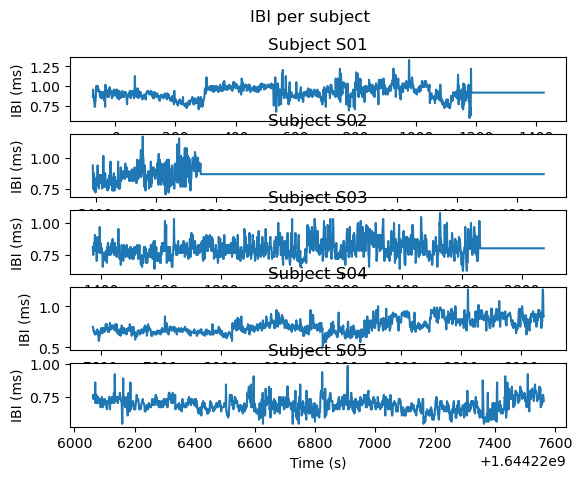

In [57]:
yaxis = pd.DataFrame(df_var.get('IBI'))
fig, axs = plt.subplots(5)
fig.suptitle('IBI per subject')

for i in names:
    ylab = yaxis.loc[:1500,[f'IBI_ms_{i}']]
    xaxis = np.linspace(init[names.index(i)], init[names.index(i)]+len(ylab), len(ylab))
    axs[names.index(i)].plot(xaxis, ylab)
    axs[names.index(i)].set_title(f'Subject {i}')
    axs[names.index(i)].set_ylabel('IBI (ms)')
    axs[names.index(i)].set_xlabel('Time (s)')
    #axs[names.index(i)].set_xlim([init[names.index(i)], init[names.index(i)]+1500])
    #axs[names.index(i)].set_ylim([0, 2000])
    #axs[names.index(i)].grid()

##### ---------------------------- Test Section -------------------------------

Section to try new things that I tried to implement :) <br>
NOT part of the assignment, just for personal record

In [58]:
# timelogs.iloc[0,3]
# timelogs.loc[[1],['Stroop Test']]

In [59]:
init = list(init)
times = [0 * i for i in range(len(names))]
for a in names:
    # init[i] = init[i] - init[0]
    times[names.index(a)] = datetime.datetime.fromtimestamp(init[names.index(a)])
#time_S05 = datetime.datetime.fromtimestamp(init[0])
#time_S04 = datetime.datetime.fromtimestamp(init[1])
#time_S03 = datetime.datetime.fromtimestamp(init[2])
#time_S02 = datetime.datetime.fromtimestamp(init[3])
#time_S01 = datetime.datetime.fromtimestamp(init[4])
print(times)

[datetime.datetime(2022, 2, 14, 9, 12, 5), datetime.datetime(2022, 2, 7, 11, 29, 49), datetime.datetime(2022, 2, 7, 10, 56, 12), datetime.datetime(2022, 2, 7, 9, 52, 54), datetime.datetime(2022, 2, 7, 9, 27, 41)]


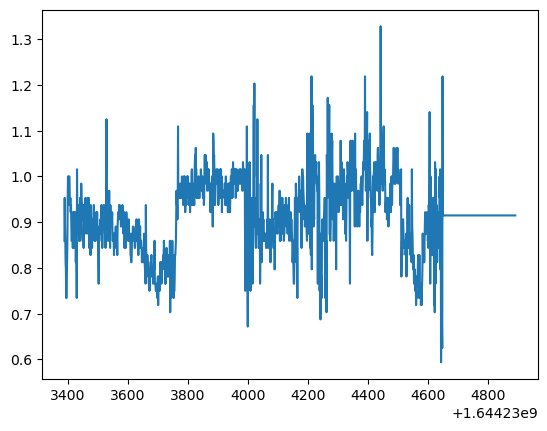

In [60]:
yaxis = pd.DataFrame(df_var.get('IBI'))
a = 'S01'
ylabel = yaxis.loc[:1500,[f'IBI_ms_{a}']]
xaxis = np.linspace(init[1], init[1]+len(ylabel), len(ylabel))
plt.plot(xaxis, ylabel)
plt.show()